# Разработка A/B-тестирования и анализ результатов

Вы работаете продуктовым аналитиком в компании, которая разрабатывает развлекательное приложение с функцией «бесконечной» ленты, как, например, в приложениях с короткими видео. В вашем приложении существует две модели монетизации: первая — ежемесячная платная подписка, которая позволяет пользователям смотреть ленту без рекламы, вторая — демонстрация рекламы для пользователей, которые ещё не оформили подписку.

Команда разработчиков рекомендательных систем создала новый алгоритм рекомендаций, который, по их мнению, будет показывать более интересный контент для каждого пользователя. Вас, как аналитика, просят помочь рассчитать параметры A/B-теста, который позволит проверить эту гипотезу, и проанализировать его результаты.

## Описание данных

Вы будете работать с тремя таблицами:

- `sessions_project_history.csv` — таблица с историческими данными по сессиям пользователей на период с 2025-08-11 по 2025-09-23. Путь к файлу: `/datasets/sessions_project_history.csv`.

- `sessions_project_test_part.csv` — таблица с данными за первый день проведения A/B-теста, то есть за 2025-10-14. Путь к файлу: `/datasets/sessions_project_test_part.csv`.

- `sessions_project_test.csv` — таблица с данными за весь период проведения A/B-теста, то есть с 2025-10-14 по 2025-11-02. Путь к файлу: `/datasets/sessions_project_test.csv`.

У этих таблиц почти совпадает структура и содержание колонок, различаются лишь периоды наблюдения.

Поля таблиц `sessions_project_history.csv`, `sessions_project_test.csv`, `sessions_project_test_part.csv`:

- `user_id` — идентификатор пользователя;

- `session_id` — идентификатор сессии в приложении;

- `session_date` — дата сессии;

- `session_start_ts` — дата и время начала сессии;

- `install_date` — дата установки приложения;

- `session_number` — порядковый номер сессии для конкретного пользователя;

- `registration_flag` — является ли пользователь зарегистрированным;

- `page_counter` — количество просмотренных страниц во время сессии;

- `region` — регион пользователя;

- `device` — тип устройства пользователя;

- `test_group` — тестовая группа (в таблице с историческими данными этого столбца нет).


## Что нужно сделать
Ваши задачи: рассчитать параметры теста, оценить корректность его проведения и проанализировать результаты эксперимента.

### 1. Работа с историческими данными (EDA)

#### 1.1. Загрузка исторических данных
На первом этапе поработайте с историческими данными приложения:

- Импортируйте библиотеку pandas.

- Считайте и сохраните в датафрейм `sessions_history` CSV-файл с историческими данными о сессиях пользователей `sessions_project_history.csv`.

Выведите на экран первые пять строк полученного датафрейма.

In [1]:
import pandas as pd

sessions_history = pd.read_csv('/datasets/sessions_project_history.csv')

sessions_history.head()

sessions_history.info()


<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 435924 entries, 0 to 435923
,Data columns (total 10 columns):
, #   Column             Non-Null Count   Dtype 
,---  ------             --------------   ----- 
, 0   user_id            435924 non-null  object
, 1   session_id         435924 non-null  object
, 2   session_date       435924 non-null  object
, 3   session_start_ts   435924 non-null  object
, 4   install_date       435924 non-null  object
, 5   session_number     435924 non-null  int64 
, 6   registration_flag  435924 non-null  int64 
, 7   page_counter       435924 non-null  int64 
, 8   region             435924 non-null  object
, 9   device             435924 non-null  object
,dtypes: int64(3), object(7)
,memory usage: 33.3+ MB


#### 1.2. Знакомство с данными
- Для каждого уникального пользователя `user_id` рассчитайте количество уникальных сессий `session_id`.

- Выведите на экран все данные из таблицы `sessions_history` для одного пользователя с наибольшим количеством сессий. Если таких пользователей несколько, выберите любого из них.

- Изучите таблицу для одного пользователя, чтобы лучше понять логику формирования каждого столбца данных.



In [2]:
# Расчитаем для каждого уникального пользователя уникальные сессии
grouped = sessions_history.groupby('user_id')
unique_sessions_count = grouped['session_id'].nunique()

# Найдем пользователя с наибольшим количеством сессий
max_sessions = unique_sessions_count.max()
user_with_max_sessions = unique_sessions_count[unique_sessions_count == max_sessions].index
print(user_with_max_sessions)

# вывести все данные из таблицы sessions_history
user_data = sessions_history[sessions_history['user_id'] == user_with_max_sessions[0]]

display(user_data)

Index(['10E0DEFC1ABDBBE0', '6A73CB5566BB494D'], dtype='object', name='user_id')


,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
115558,10E0DEFC1ABDBBE0,B8F0423BBFFCF5DC,2025-08-14,2025-08-14 13:57:39,2025-08-14,1,0,4,CIS,Android
191751,10E0DEFC1ABDBBE0,87CA2FA549473837,2025-08-15,2025-08-15 16:42:10,2025-08-14,2,0,3,CIS,Android
239370,10E0DEFC1ABDBBE0,4ADD8011DCDCE318,2025-08-16,2025-08-16 19:53:21,2025-08-14,3,0,3,CIS,Android
274629,10E0DEFC1ABDBBE0,DF0FD0E09BF1F3D7,2025-08-17,2025-08-17 15:03:43,2025-08-14,4,0,1,CIS,Android
302501,10E0DEFC1ABDBBE0,3C221774B4DE6885,2025-08-18,2025-08-18 17:29:14,2025-08-14,5,0,4,CIS,Android
325557,10E0DEFC1ABDBBE0,031BD7A67048105B,2025-08-19,2025-08-19 13:23:55,2025-08-14,6,0,2,CIS,Android
345336,10E0DEFC1ABDBBE0,FF4315CF4AD4B100,2025-08-20,2025-08-20 19:31:54,2025-08-14,7,0,2,CIS,Android
377532,10E0DEFC1ABDBBE0,4045FEA0747203B4,2025-08-22,2025-08-22 17:54:13,2025-08-14,8,0,2,CIS,Android
403538,10E0DEFC1ABDBBE0,344B086C421C7F37,2025-08-24,2025-08-24 14:46:13,2025-08-14,9,0,2,CIS,Android
414743,10E0DEFC1ABDBBE0,054F20BA371E4C9D,2025-08-25,2025-08-25 18:36:41,2025-08-14,10,0,3,CIS,Android


#### 1.3. Анализ числа регистраций
Одна из важнейших метрик продукта — число зарегистрированных пользователей. Используя исторические данные, визуализируйте, как менялось число регистраций в приложении за время его существования.

- Агрегируйте исторические данные и рассчитайте число уникальных пользователей и число зарегистрированных пользователей для каждого дня наблюдения. Для простоты считайте, что у пользователя в течение дня бывает одна сессия максимум и статус регистрации в течение одного дня не может измениться.

- Постройте линейные графики общего числа пользователей и общего числа зарегистрированных пользователей по дням. Отобразите их на одном графике.

- Постройте отдельный линейный график доли зарегистрированных пользователей от всех пользователей по дням.

- На обоих графиках должны быть заголовок, подписанные оси X и Y, сетка и легенда.

In [3]:
# Преобразуем столбец с датой в формат datetime
sessions_history['session_date'] = pd.to_datetime(sessions_history['session_date'])

# Сгруппируем данные по дате и статусу регистрации
grouped = sessions_history.groupby([sessions_history['session_date'].dt.date, 'registration_flag'])

# Подсчитаем количество уникальных пользователей для каждой группы
unique_users_count = grouped['user_id'].nunique()

# Распределиv данные по двум сериям: общее число пользователей и число зарегистрированных пользователей
aggregated_data = unique_users_count.unstack(fill_value=0)



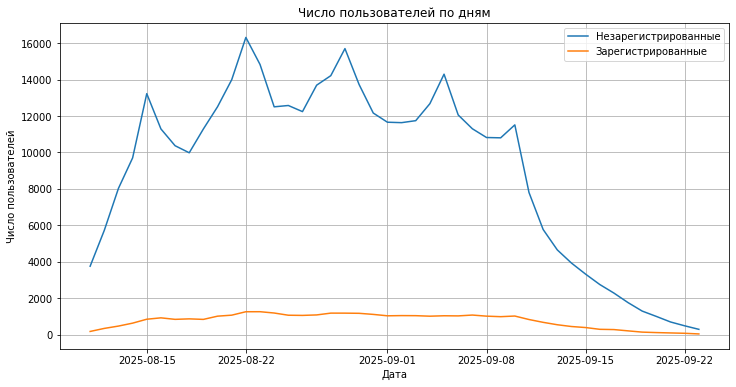

In [4]:
import matplotlib.pyplot as plt

# Построим графики
aggregated_data.plot(kind='line', grid=True, figsize=(12, 6))
plt.title('Число пользователей по дням')
plt.xlabel('Дата')
plt.ylabel('Число пользователей')
plt.legend(['Незарегистрированные', 'Зарегистрированные'])
plt.show()

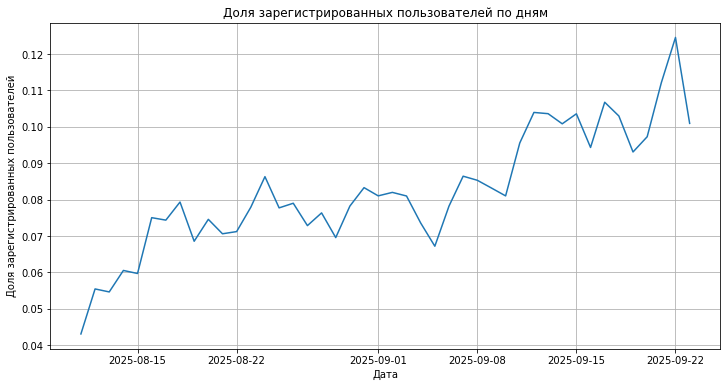

In [5]:
# Рассчитываем общее число пользователей и число зарегистрированных пользователей
total_users = aggregated_data.sum(axis=1)
registered_users = aggregated_data[1]  

# Вычисляем долю зарегистрированных пользователей
registration_rate = registered_users / total_users

# Строим график
registration_rate.plot(kind='line', grid=True, figsize=(12, 6))
plt.title('Доля зарегистрированных пользователей по дням')
plt.xlabel('Дата')
plt.ylabel('Доля зарегистрированных пользователей')
plt.show()

#### 1.4. Анализ числа просмотренных страниц
Другая важная метрика продукта — число просмотренных страниц в приложении. Чем больше страниц просмотрено, тем сильнее пользователь увлечён контентом, а значит, выше шансы, что он зарегистрируется и оплатит подписку.

- Найдите количество сессий для каждого значения количества просмотренных страниц. Например: одну страницу просмотрели в 29 160 сессиях, две страницы — в 105 536 сессиях и так далее.

- Постройте столбчатую диаграмму, где по оси X будет число просмотренных страниц, по оси Y — количество сессий.

- На диаграмме должны быть заголовок, подписанные оси X и Y.

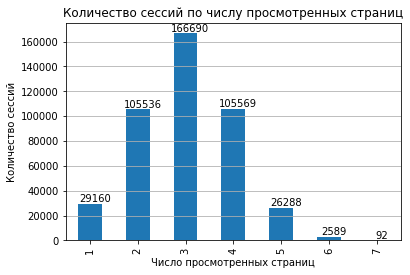

In [6]:
# Подсчитаем количество сессий для каждого количества просмотренных страниц
page_views_count = sessions_history.groupby('page_counter').size()

# построим столбчатую диаграмму
page_views_count.plot(kind='bar')
plt.title('Количество сессий по числу просмотренных страниц')
plt.xlabel('Число просмотренных страниц')
plt.ylabel('Количество сессий')
plt.grid(axis='y')

for i, v in enumerate(page_views_count.values):
    plt.text(page_views_count.index[i] - 0.9, v, str(v), ha='center', va='bottom')
plt.show()


#### 1.5. Доля пользователей, просмотревших более четырёх страниц
Продуктовая команда продукта считает, что сессии, в рамках которых пользователь просмотрел 4 и более страниц, говорят об удовлетворённости контентом и алгоритмами рекомендаций. Этот показатель является важной прокси-метрикой для продукта.

- В датафрейме `sessions_history` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если было просмотрено меньше.

- Постройте график со средним значением доли успешных сессий от всех сессий по дням за весь период наблюдения.

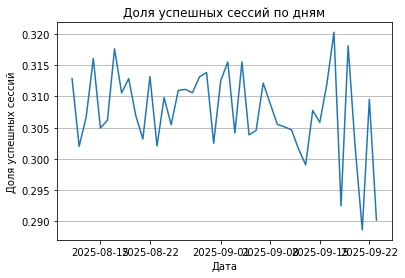

In [7]:
# создадим дополнительный столбец good_session в датафрейме sessions_history
sessions_history['good_session'] = sessions_history['page_counter'].apply(lambda x: 1 if x >= 4 else 0)

# Группируем данные по дате
grouped_by_date = sessions_history.groupby(sessions_history['session_date'].dt.date)['good_session'].mean()

# Строим график
grouped_by_date.plot(kind='line')
plt.title('Доля успешных сессий по дням')
plt.xlabel('Дата')
plt.ylabel('Доля успешных сессий')
plt.grid(axis='y')
plt.show()



### 2. Подготовка к тесту
При планировании теста необходимо проделать несколько важных шагов:

- Сформулировать нулевую и альтернативную гипотезы

- Определиться с целевой метрикой.

- Рассчитать необходимый размер выборки.

- Исходя из текущих значений трафика рассчитать необходимую длительность проведения теста.

#### 2.1 Формулировка нулевой и альтернативной гипотез

Перед тем как проводить А/B-тест, необходимо сформулировать нулевую и альтернативную гипотезы. Напомним изначальное условие: команда разработчиков рекомендательных систем создала новый алгоритм, который, по их мнению, будет показывать более интересный контент для каждого пользователя.

О какой метрике идёт речь? Как она будет учтена в формулировке гипотез?

Сформулируйте нулевую и альтернативную гипотезы:






Нулевая гипотеза (H0): новый алгоритм не влияет на метрику вовлечённости пользователей ( количество просмотренных страниц), и среднее значение этой метрики остаётся неизменным по сравнению с текущим алгоритмом.

Альтернативная гипотеза (H1): новый алгоритм улучшает метрику вовлечённости пользователей, и среднее значение этой метрики увеличивается по сравнению с текущим алгоритмом.


#### 2.2. Расчёт размера выборки
В рамках курса вы уже рассчитывали размеры выборки и  использовали для этого онлайн-калькулятор. В этом задании предлагаем воспользоваться готовым кодом и рассчитать необходимое для вашего эксперимента количество пользователей.

Для этого установите в коде ниже следующие параметры:

- Уровень значимости — 0.05.

- Вероятность ошибки второго рода — 0.2.

- Мощность теста.

- Минимальный детектируемый эффект, или MDE, — 3%. Обратите внимание, что здесь нужно указать десятичную дробь, а не процент.

При расчёте размера выборки используйте метод `solve_power()` из класса `power.NormalIndPower` модуля `statsmodels.stats`.

Запустите ячейку и изучите полученное значение.

In [8]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 1 - beta  # Мощность теста
p = 0.3  # Базовый уровень доли
mde = 0.03 * p  # Минимальный детектируемый эффект
effect_size = proportion_effectsize(p, p + mde)

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size=effect_size,
    power=power,
    alpha=alpha,
    ratio=1  # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")


Необходимый размер выборки для каждой группы: 41040


#### 2.3. Расчёт длительности A/B-теста

Используйте данные о количестве пользователей в каждой выборке и среднем количестве пользователей приложения. Рассчитайте длительность теста, разделив одно на другое.

- Рассчитайте среднее количество уникальных пользователей приложения в день.

- Определите длительность теста исходя из рассчитанного значения размера выборок и среднего дневного трафика приложения. Количество дней округлите в большую сторону.

In [9]:
from math import ceil


# Среднее количество пользователей приложения в день по историческим данным
daily_unique_users = sessions_history.groupby('session_date')['user_id'].nunique()
avg_daily_users = daily_unique_users.mean()

# Рассчитываем длительность теста в днях как отношение размера выборки к среднему числу пользователей
test_duration = ceil((sample_size*2) / avg_daily_users)


print(f"Рассчитанная длительность A/B-теста при текущем уровене трафика в {avg_daily_users} пользователей в день составит {test_duration} дней")

Рассчитанная длительность A/B-теста при текущем уровене трафика в 9907.363636363636 пользователей в день составит 9 дней


### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей

A/B-тест успешно запущен, и уже доступны данные за первые три дня. На этом этапе нужно убедиться, что всё идёт хорошо: пользователи разделены правильным образом, а интересующие вас метрики корректно считаются.

- Считайте и сохраните в датафрейм `sessions_test_part` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test_part.csv`.

- Рассчитайте количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения.

- Рассчитайте и выведите на экран процентную разницу в количестве пользователей в группах A и B. Постройте любую удобную визуализацию, на которой будет видно возможное различие двух групп.

Для расчёта процентной разницы воспользуйтесь формулой:
$$P = 100 \cdot  \frac{|A − B|}{A}$$

In [10]:
# Прочитаем данные из CSV-файла
sessions_test_part = pd.read_csv('/datasets/sessions_project_test_part.csv')

# Рассчитаем количество уникальных пользователей в каждой группе для одного дня:
daily_unique_users = sessions_test_part.groupby(['session_date', 'test_group'])['user_id'].nunique()

date_of_interest = '2025-10-14'  
users_per_group = daily_unique_users.loc[date_of_interest]
print(users_per_group)

# Рассчитать процентную разницу:
group_A_users = users_per_group['A']
group_B_users = users_per_group['B']
P = 100 * abs(group_A_users - group_B_users) / group_A_users
print(f"Процентная разница в количестве пользователей: {P}%")

test_group
,A    1477
,B    1466
,Name: user_id, dtype: int64
,Процентная разница в количестве пользователей: 0.7447528774542993%


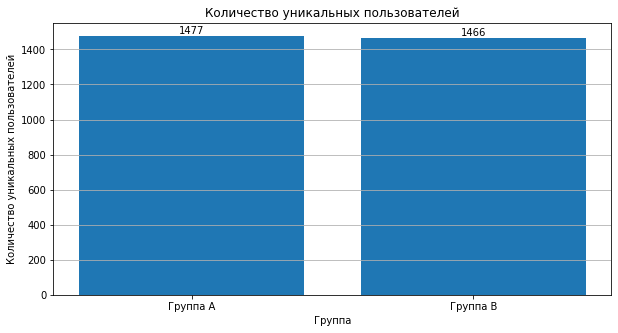

In [11]:
# Визуализируем результат
plt.figure(figsize=(10, 5))  # Устанавливаем размеры фигуры
plt.bar(['Группа A', 'Группа B'], [group_A_users, group_B_users])
plt.title('Количество уникальных пользователей')
plt.xlabel('Группа')
plt.ylabel('Количество уникальных пользователей')
plt.grid(axis='y')

# Добавляем подписи значений на столбцы
for i, v in enumerate([group_A_users, group_B_users]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


Процентная разница в количестве пользователей между группами A и B показывает, насколько различается количество уникальных пользователей в этих группах относительно друг друга. В нашем случае разница составила примерно 0.74%.

Такое небольшое различие может указывать на то, что распределение пользователей по группам произошло равномерно и случайно, без значительных смещений, что является хорошим признаком корректности проведения A/B-теста

#### 3.2. Проверка пересечений пользователей
Помимо проверки равенства количества пользователей в группах, полезно убедиться в том, что группы независимы. Для этого нужно убедиться, что никто из пользователей случайно не попал в обе группы одновременно.

- Рассчитайте количество пользователей, которые встречаются одновременно в группах A и B, или убедитесь, что таких нет.

In [12]:
# рассчитаем количество пользователей, которые встречаются одновременно в группах A и B
group_A_users = set(sessions_test_part[sessions_test_part['test_group'] == 'A']['user_id'])
group_B_users = set(sessions_test_part[sessions_test_part['test_group'] == 'B']['user_id'])

# Находим пересечение пользователей в обеих группах
common_users = group_A_users.intersection(group_B_users)

# Выводим количество общих пользователей
print(f"Количество пользователей, встречающихся одновременно в группах A и B: {len(common_users)}")


Количество пользователей, встречающихся одновременно в группах A и B: 0


Выяснили, что пересечений между группами нет — это подтверждает независимость групп, что является важным условием для корректного проведения A/B-теста. 

#### 3.3. Равномерность разделения пользователей по устройствам
Полезно также убедиться в том, что пользователи равномерно распределены по всем доступным категориальным переменным — типам устройств и регионам.

Постройте две диаграммы:

- доля каждого типа устройства для пользователей из группы A,

- доля каждого типа устройства для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение устройств в группах A и B.


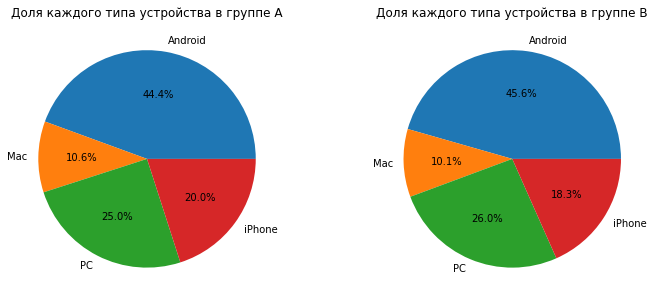

In [13]:
# Группируем данные по группе и типу устройства
group_A_device_counts = sessions_test_part[sessions_test_part['test_group'] == 'A'].groupby('device')['user_id'].nunique()
group_B_device_counts = sessions_test_part[sessions_test_part['test_group'] == 'B'].groupby('device')['user_id'].nunique()

# Рассчитываем доли для каждой группы
group_A_device_shares = group_A_device_counts / group_A_device_counts.sum()
group_B_device_shares = group_B_device_counts / group_B_device_counts.sum()

# Строим диаграммы
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].pie(group_A_device_shares, labels=group_A_device_shares.index, autopct='%1.1f%%')
axes[0].set_title('Доля каждого типа устройства в группе A')

axes[1].pie(group_B_device_shares, labels=group_B_device_shares.index, autopct='%1.1f%%')
axes[1].set_title('Доля каждого типа устройства в группе B')

plt.show()
 

На круговых диаграммах мы наблюдаем примерно одинаковое распределение устройств по группам. Это хороший знак, так как повышает вероятность того, что любые выявленные различия в результатах теста будут обусловлены влиянием тестируемого фактора, а не характеристиками устройств.  

#### 3.4. Равномерность распределения пользователей по регионам
Теперь убедитесь, что пользователи равномерно распределены по регионам.

Постройте две диаграммы:

- доля каждого региона для пользователей из группы A,

- доля каждого региона для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение регионов в группах A и B. Постарайтесь использовать другой тип диаграммы, не тот, что в прошлом задании.


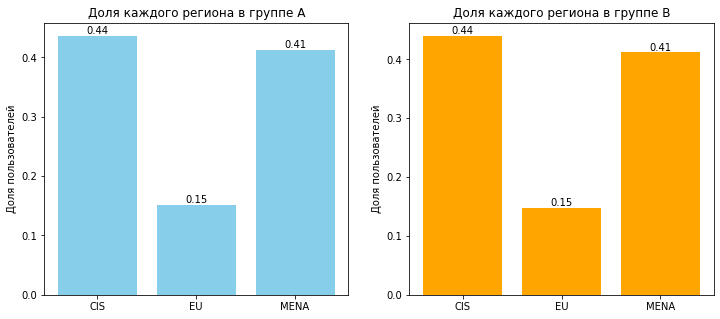

In [14]:
# Группируем данные по группе и региону, учитывая уникальных пользователей
group_A_region_counts = sessions_test_part[sessions_test_part['test_group'] == 'A'].groupby('region')['user_id'].nunique()
group_B_region_counts = sessions_test_part[sessions_test_part['test_group'] == 'B'].groupby('region')['user_id'].nunique()

# Рассчитываем доли для каждой группы
group_A_region_shares = group_A_region_counts / group_A_region_counts.sum()
group_B_region_shares = group_B_region_counts / group_B_region_counts.sum()

# Строим диаграммы
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(group_A_region_shares.index, group_A_region_shares, color='skyblue')
axes[0].set_title('Доля каждого региона в группе A')
axes[0].set_ylabel('Доля пользователей')

for i, v in enumerate(group_A_region_shares): axes[0].text(i, v, f'{v:.2f}', ha='center', va='bottom')

axes[1].bar(group_B_region_shares.index, group_B_region_shares, color='orange')
axes[1].set_title('Доля каждого региона в группе B')
axes[1].set_ylabel('Доля пользователей')

for i, v in enumerate(group_B_region_shares): axes[1].text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()



#### 3.5. Вывод после проверки A/B-теста

На основе проведённого анализа A/B-теста сформулируйте и запишите свои выводы. В выводе обязательно укажите:

- Было ли обнаружено различие в количестве пользователей в двух группах.

- Являются ли выборки независимыми. Было ли обнаружено пересечение пользователей из тестовой и контрольной групп.

- Сохраняется ли равномерное распределение пользователей тестовой и контрольной групп по категориальным переменным: устройствам и регионам.

Сделайте заключение: корректно ли проходит A/B-тест, или наблюдаются какие-либо нарушения.

#### Различие в количестве пользователей в двух группах: на основе рассчитанной процентной разницы было выявлено минимальное различие в количестве пользователей между группами A и B, что указывает на равномерное распределение пользователей.

#### Независимость выборок: проверка пересечений показала, что пользователей, попавших одновременно в обе группы, нет. Это подтверждает независимость выборок и корректность разделения групп.

#### Равномерное распределение по категориальным переменным: анализ распределения пользователей по типам устройств и регионам в группах A и B показал схожесть в распределении. Это говорит о том, что группы сопоставимы по ключевым характеристикам и факторам, что важно для достоверности результатов теста.

### Заключение: на основании проведённого анализа можно сделать вывод, что A/B-тест проходит корректно. Выборок независимы, пользователи равномерно распределены по группам и ключевым категориальным переменным. Это создаёт условия для получения надёжных и интерпретируемых результатов тестирования.

### 4. Проверка результатов A/B-теста

A/B-тест завершён, и у вас есть результаты за все дни проведения эксперимента. Необходимо убедиться в корректности теста и верно интерпретировать результаты.

#### 4.1. Получение результатов теста и подсчёт основной метрики

- Считайте и сохраните в датафрейм `sessions_test` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test.csv`.

- В датафрейме `sessions_test` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если просмотрено меньше.

In [15]:
# Читаем данные из CSV-файла
sessions_test = pd.read_csv('/datasets/sessions_project_test.csv')

# Создаём дополнительный столбец good_session
sessions_test['good_session'] = sessions_test['page_counter'].apply(lambda x: 1 if x >= 4 else 0)

display(sessions_test)


,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group,good_session
0,6DAE3B3654DA738E,C69249E26E58F6E2,2025-10-26,2025-10-26 18:15:05,2025-10-16,3,0,3,MENA,Android,A,0
1,0A3FE5D1DD59110A,66D66D7C9F5181B7,2025-10-21,2025-10-21 17:04:53,2025-10-15,2,1,2,CIS,Android,B,0
2,2041F1D7AA740B88,50DE51D42215E74C,2025-10-23,2025-10-23 17:39:29,2025-10-19,3,0,2,MENA,Android,A,0
3,43D7585009168086,5763C0C353C22263,2025-10-24,2025-10-24 15:01:57,2025-10-18,4,0,1,CIS,iPhone,B,0
4,15AD68B14D62D88C,B1AD09F93C1053BC,2025-10-17,2025-10-17 17:34:39,2025-10-17,1,0,2,MENA,Android,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...
100000,CF77C27B238C1BE3,0F7BC9B33685377C,2025-10-22,2025-10-22 19:01:50,2025-10-20,3,0,3,MENA,Android,A,0
100001,D7ED66C581409AC2,26C4475005E70F47,2025-10-17,2025-10-17 22:12:38,2025-10-17,1,0,5,CIS,PC,A,1
100002,E7EA2D51238020C6,9B9CDE6A612CBD73,2025-10-24,2025-10-24 14:54:07,2025-10-14,2,0,3,MENA,PC,B,0
100003,8A6FEFD7F34C5DA1,37291EC27106EF9D,2025-10-18,2025-10-18 00:05:10,2025-10-14,3,0,4,EU,Android,B,1


#### 4.2. Проверка корректности результатов теста

Прежде чем приступать к анализу ключевых продуктовых метрик, необходимо убедиться, что тест проведён корректно и вы будете сравнивать две сопоставимые группы.

- Рассчитайте количество уникальных сессий для каждого дня и обеих тестовых групп, используя группировку.

- Проверьте, что количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимыми. Используйте статистический тест, который позволит сделать вывод о равенстве средних двух выборок.

- В качестве ответа выведите на экран полученное значение p-value и интерпретируйте его.

In [16]:
# Группируем данные по дате и группе и подсчитываем количество уникальных сессий
daily_unique_sessions = sessions_test.groupby(['session_date', 'test_group'])['user_id'].nunique()

# Выводим результат
print(daily_unique_sessions)


session_date  test_group
,2025-10-14    A             1477
,              B             1466
,2025-10-15    A             2220
,              B             2262
,2025-10-16    A             3255
,              B             3214
,2025-10-17    A             4070
,              B             4028
,2025-10-18    A             4999
,              B             5038
,2025-10-19    A             6532
,              B             6763
,2025-10-20    A             5822
,              B             6076
,2025-10-21    A             3919
,              B             3972
,2025-10-22    A             3062
,              B             3093
,2025-10-23    A             2459
,              B             2529
,2025-10-24    A             2082
,              B             2064
,2025-10-25    A             1888
,              B             1797
,2025-10-26    A             1658
,              B             1678
,2025-10-27    A             1449
,              B             1486
,2025-10-28    A       

In [17]:
from scipy.stats import ttest_ind

# Разделяем данные по группам A и B
group_A_sessions = daily_unique_sessions.loc[:, 'A'].values
group_B_sessions = daily_unique_sessions.loc[:, 'B'].values

# Проводим t-тест
t_stat, p_value = ttest_ind(group_A_sessions, group_B_sessions)

print(f"Значение p-value: {p_value}")


Значение p-value: 0.9530788808724806


p-value равное примерно 0.953. Это значение значительно больше общепринятого уровня значимости 0.05. Следовательно, можно сделать вывод, что различия в количестве уникальных сессий между группами A и B не являются статистически значимыми. 

#### 4.3. Сравнение доли успешных сессий

Когда вы убедились, что количество сессий в обеих выборках не различалось, можно переходить к анализу ключевой метрики — доли успешных сессий.

Используйте созданный на первом шаге задания столбец `good_session` и рассчитайте долю успешных сессий для выборок A и B, а также разницу в этом показателе. Полученный вывод отобразите на экране.

In [18]:
# Группируем данные по тестовой группе и рассчитываем долю успешных сессий
group_A_success_rate = sessions_test[sessions_test['test_group'] == 'A']['good_session'].mean()
group_B_success_rate = sessions_test[sessions_test['test_group'] == 'B']['good_session'].mean()

# Рассчитываем разницу в доле успешных сессий между группами
difference_in_success_rates = group_A_success_rate - group_B_success_rate

print(f"Доля успешных сессий в группе A: {group_A_success_rate}")
print(f"Доля успешных сессий в группе B: {group_B_success_rate}")
print(f"Разница в доле успешных сессий: {difference_in_success_rates}")


Доля успешных сессий в группе A: 0.3077233557344958
,Доля успешных сессий в группе B: 0.31828992745867524
,Разница в доле успешных сессий: -0.010566571724179463


#### 4.4. Насколько статистически значимо изменение ключевой метрики

На предыдущем шаге вы убедились, что количество успешных сессий в тестовой выборке примерно на 1.1% выше, чем в контрольной, но делать выводы только на основе этого значения будет некорректно. Для принятия решения всегда необходимо отвечать на вопрос: является ли это изменение статистически значимым.

- Используя статистический тест, рассчитайте, является ли изменение в метрике доли успешных сессий статистически значимым.

- Выведите на экран полученное значение p-value и свои выводы о статистической значимости. Напомним, что уровень значимости в эксперименте был выбран на уровне 0.05.

In [19]:
from statsmodels.stats.proportion import proportions_ztest

# Подсчитываем количество успешных и общее количество сессий для каждой группы
successes_A = sessions_test[sessions_test['test_group'] == 'A']['good_session'].sum()
total_A = len(sessions_test[sessions_test['test_group'] == 'A'])

successes_B = sessions_test[sessions_test['test_group'] == 'B']['good_session'].sum()
total_B = len(sessions_test[sessions_test['test_group'] == 'B'])

# Проводим z-тест
stat, p_value = proportions_ztest([successes_A, successes_B], [total_A, total_B])

print(f"Значение p-value: {p_value}")



Значение p-value: 0.0003149479976072246


Мы получили значение p-value равное примерно 0.0003. Это значение значительно меньше общепринятого уровня значимости 0.05. Следовательно, можно сделать вывод, что разница в доле успешных сессий между группами A и B является статистически значимой и изменения в тестовой группе эффективны.

#### 4.5. Вывод по результатам A/B-эксперимента

На основе проведённого анализа результатов теста сформулируйте и запишите свои выводы для команды разработки приложения. В выводе обязательно укажите:

- Характеристики проведённого эксперимента, количество задействованных пользователей и длительность эксперимента.

- Повлияло ли внедрение нового алгоритма рекомендаций на рост ключевой метрики и как.

- Каким получилось значение p-value для оценки статистической значимости выявленного эффекта.

- Стоит ли внедрять нововведение в приложение.

Вывод по результатам A/B-эксперимента: - Эксперимент проводился с [2025-10-14] по [2025-11-02], в нём участвовало [41040] человек в каждой группе. - Внедрение нового алгоритма рекомендаций привело к увеличению доли успешных сессий на [1.1]%. - Полученное значение p-value составило [0.0003], что указывает на статистическую значимость выявленного эффекта. - На основании результатов эксперимента рекомендуется внедрить новый алгоритм рекомендаций в приложение, так как он положительно влияет на ключевую метрику.